In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import warnings
from collections import Counter
import gc

warnings.filterwarnings("ignore")
%load_ext lab_black

In [2]:
diabetes = pd.read_csv("Pimadiabetes.csv")
diabetes.head()

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,72,35,0,33.6,0.627,50,1
1,1,66,29,0,26.6,0.351,31,0
2,8,64,0,0,23.3,0.672,32,1
3,1,66,23,94,28.1,0.167,21,0
4,0,40,35,168,43.1,2.288,33,1


In [3]:
print(diabetes.groupby("Outcome").size())

Outcome
0    500
1    268
dtype: int64


## Splitting Data into Train, Test 

In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


# Data Description

In [5]:
diabetes.describe()

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes.head(5)

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,72,35,0,33.6,0.627,50,1
1,1,66,29,0,26.6,0.351,31,0
2,8,64,0,0,23.3,0.672,32,1
3,1,66,23,94,28.1,0.167,21,0
4,0,40,35,168,43.1,2.288,33,1


In [7]:
X = diabetes.drop("Outcome", axis=1)
y = diabetes.Outcome

In [8]:
Counter(y)

Counter({1: 268, 0: 500})

In [9]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X, y = rus.fit_resample(X, y)

In [10]:
Counter(y)

Counter({0: 268, 1: 268})

In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.2
)

In [13]:
X_train.shape, y_train.shape

((428, 7), (428,))

# Without HyperParameters

In [14]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
mlp = MLPClassifier(random_state=12)
mlp.fit(X_train, y_train)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
lr = LogisticRegression()
lr.fit(X_train, y_train)
svc = SVC()
svc.fit(X_train, y_train)

results = {
    "Algorithm": [
        "KNeighborsClassifier",
        "DecisionTreeClassifier",
        "MLPClassifier",
        "RandomForestClassifier",
        "LogisticRegression",
        "SVC",
    ],
    "Train Accuracy": [
        knn.score(X_train, y_train),
        tree.score(X_train, y_train),
        mlp.score(X_train, y_train),
        rf.score(X_train, y_train),
        lr.score(X_train, y_train),
        svc.score(X_train, y_train),
    ],
    "Test Accuracy": [
        knn.score(X_test, y_test),
        tree.score(X_test, y_test),
        mlp.score(X_test, y_test),
        rf.score(X_test, y_test),
        lr.score(X_test, y_test),
        svc.score(X_test, y_test),
    ],
}
results_noParams = pd.DataFrame(results)
results_noParams.sort_values(by=["Test Accuracy"], ascending=False, inplace=True)
results_noParams

,Algorithm,Train Accuracy,Test Accuracy
2,MLPClassifier,0.719626,0.796296
5,SVC,0.731308,0.768519
0,KNeighborsClassifier,0.750000,0.750000
3,RandomForestClassifier,1.000000,0.750000
4,LogisticRegression,0.679907,0.750000
1,DecisionTreeClassifier,1.000000,0.722222


In [15]:
gc.collect()

1453

# Using GridSearchCV for Hyper Parameter Tuning

In [16]:
GSknn = KNeighborsClassifier(n_jobs=1, n_neighbors=10, weights="distance")
GSknn.fit(X_train, y_train)

GStree = DecisionTreeClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=4)
GStree.fit(X_train, y_train)

GSsvc = SVC(C=2, gamma="scale", kernel="linear")
GSsvc.fit(X_train, y_train)

GSmlp = MLPClassifier(
    activation="relu",
    alpha=0.05,
    hidden_layer_sizes=(100,),
    learning_rate="constant",
    solver="adam",
    random_state=12,
)
GSmlp.fit(X_train, y_train)

GSrf = RandomForestClassifier(
    max_features="log2", min_samples_leaf=2, min_samples_split=4, random_state=21
)
GSrf.fit(X_train, y_train)

results = {
    "Algorithm": [
        "KNeighborsClassifier",
        "DecisionTreeClassifier",
        "MLPClassifier",
        "RandomForestClassifier",
        "SVC",
    ],
    "Train Accuracy": [
        GSknn.score(X_train, y_train),
        GStree.score(X_train, y_train),
        GSmlp.score(X_train, y_train),
        GSrf.score(X_train, y_train),
        GSsvc.score(X_train, y_train),
    ],
    "Test Accuracy": [
        GSknn.score(X_test, y_test),
        GStree.score(X_test, y_test),
        GSmlp.score(X_test, y_test),
        GSrf.score(X_test, y_test),
        GSsvc.score(X_test, y_test),
    ],
}

results_withParams = pd.DataFrame(results)
results_withParams.sort_values(by=["Test Accuracy"], ascending=False, inplace=True)
results_withParams

,Algorithm,Train Accuracy,Test Accuracy
2,MLPClassifier,0.724299,0.796296
4,SVC,0.689252,0.777778
3,RandomForestClassifier,0.990654,0.740741
0,KNeighborsClassifier,1.000000,0.731481
1,DecisionTreeClassifier,0.740654,0.648148


In [17]:
gc.collect()

1939

# Experimentation to improve Test Accuracy by recurrently dropping a feature

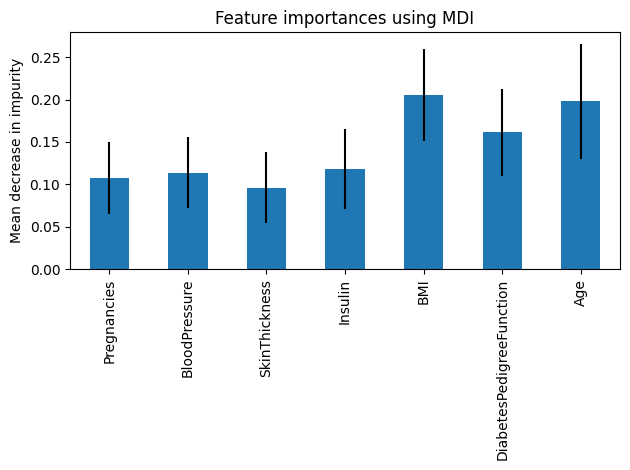

In [18]:
import matplotlib.pyplot as plt

forest_importances = pd.Series(GSrf.feature_importances_, index=diabetes.columns[:-1])

importances = GSrf.feature_importances_
std = np.std([tree.feature_importances_ for tree in GSrf.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [19]:
diabetes.head()

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,72,35,0,33.6,0.627,50,1
1,1,66,29,0,26.6,0.351,31,0
2,8,64,0,0,23.3,0.672,32,1
3,1,66,23,94,28.1,0.167,21,0
4,0,40,35,168,43.1,2.288,33,1


In [20]:
def shuffle(shuffle_model):
    dropped = []
    train_res = []
    test_res = []

    for i in range(len(diabetes.columns) - 2):
        X = diabetes.drop("Outcome", axis=1)
        X.drop(X.columns[i], axis=1, inplace=True)
        y = diabetes.Outcome
        col = X.columns[i]
        X = scaler.fit_transform(X)
        rus = RandomUnderSampler(random_state=42)
        X, y = rus.fit_resample(X, y)
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, random_state=42, test_size=0.2
        )
        shuffle_model.fit(X_train, y_train)
        train_score = shuffle_model.score(X_train, y_train)
        test_score = shuffle_model.score(X_test, y_test)
        dropped.append(col)
        train_res.append(train_score)
        test_res.append(test_score)

    scores = pd.DataFrame(
        {"Dropped Columns": dropped, "Test_Scores": test_res, "Train_Scores": train_res}
    )
    scores = scores.sort_values(by="Test_Scores", ascending=False)
    return scores.iloc[0]

# Without HyperParameters

In [21]:
print("\nMLPClassifier")
print(shuffle(mlp))

print("\nRandomForestClassifier")
print(shuffle(knn))

print("DecisionTreeClassifier")
print(shuffle(tree))

print("\nKNeighborsClassifier")
print(shuffle(knn))

print("\nSVC")
print(shuffle(svc))
gc.collect()


MLPClassifier
Dropped Columns    BloodPressure
Test_Scores             0.787037
Train_Scores            0.721963
Name: 0, dtype: object

RandomForestClassifier
Dropped Columns     Insulin
Test_Scores            0.75
Train_Scores       0.761682
Name: 2, dtype: object
DecisionTreeClassifier
Dropped Columns     Insulin
Test_Scores        0.703704
Train_Scores            1.0
Name: 2, dtype: object

KNeighborsClassifier
Dropped Columns     Insulin
Test_Scores            0.75
Train_Scores       0.761682
Name: 2, dtype: object

SVC
Dropped Columns    SkinThickness
Test_Scores             0.768519
Train_Scores            0.721963
Name: 1, dtype: object


1467

# With HyperParameters

In [22]:
print("\nMLPClassifier")
print(shuffle(GSmlp))

print("\nRandomForestClassifier")
print(shuffle(GSrf))

print("\nKNeighborsClassifier")
print(shuffle(GSknn))

print("DecisionTreeClassifier")
print(shuffle(GStree))

print("\nSVC")
print(shuffle(GSsvc))

gc.collect()


MLPClassifier
Dropped Columns    BloodPressure
Test_Scores             0.787037
Train_Scores            0.714953
Name: 0, dtype: object

RandomForestClassifier
Dropped Columns         BMI
Test_Scores        0.759259
Train_Scores       0.983645
Name: 3, dtype: object

KNeighborsClassifier
Dropped Columns    SkinThickness
Test_Scores             0.759259
Train_Scores                 1.0
Name: 1, dtype: object
DecisionTreeClassifier
Dropped Columns    SkinThickness
Test_Scores             0.675926
Train_Scores            0.735981
Name: 1, dtype: object

SVC
Dropped Columns    BloodPressure
Test_Scores             0.777778
Train_Scores            0.705607
Name: 0, dtype: object


562

# Model persistence

In [23]:
import pickle

pickle.dump(rf, open("Pimadiabetes.pkl", "wb"))